In [2]:
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from txai.models.encoders.transformer_simple import TransformerMVTS
from txai.utils.experimental import get_explainer
from txai.vis.vis_saliency import vis_one_saliency
from txai.utils.data import process_Synth
from txai.synth_data.simple_spike import SpikeTrainDataset

from txai.models.modelv6_v2 import Modelv6_v2

In [ ]:
out = get_outputs('scs_better', model_path = '/n/data1/hms/dbmi/zitnik/lab/users/owq978/TimeSeriesCBM/experiments/scs_better/experiments_04-17/models/v6_exp8_gsatw=1.00_cw=2.00_split=1.pt')

In [3]:
out = torch.load('/n/data1/hms/dbmi/zitnik/lab/users/owq978/TimeSeriesCBM/experiments/evaluation/outputs/out.pt')

In [4]:
list(out.keys())

['pred',
 'pred_mask',
 'mask_logits',
 'concept_scores',
 'ste_mask',
 'smooth_src',
 'p',
 'all_z',
 'z_mask_list',
 'concept_selections_inds']

In [5]:
out['concept_scores'].shape

torch.Size([750, 1, 2])

In [6]:
Dname = 'scs_better'

# Switch on loading test data:
if Dname == 'freqshape':
    D = process_Synth(split_no = 1, device = None, base_path = '/n/data1/hms/dbmi/zitnik/lab/users/owq978/TimeSeriesCBM/datasets/FreqShape')
elif Dname == 'seqcombsingle':
    D = process_Synth(split_no = 1, device = None, base_path = '/n/data1/hms/dbmi/zitnik/lab/users/owq978/TimeSeriesCBM/datasets/SeqCombSingle')
elif Dname == 'scs_better':
    D = process_Synth(split_no = 1, device = None, base_path = '/n/data1/hms/dbmi/zitnik/lab/users/owq978/TimeSeriesCBM/datasets/SeqCombSingleBetter')
elif Dname == 'freqshapeud':
    D = process_Synth(split_no = 1, device = None, base_path = '/n/data1/hms/dbmi/zitnik/lab/users/owq978/TimeSeriesCBM/datasets/FreqShapeUD')

In [10]:
X, times, y = D['test']
print(y)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
yp = y[y != 0]

In [ ]:
# Extract scores for each concept per class:
#[[C1_1, C2_1], [C1_2, C2_2], ...]

# bars = np.zeros((3, out['concept_scores'].shape[-1], (out['concept_scores'].shape[0] // 3))) #(Ny, Nc, B//3)

# for i in range(out['concept_scores'].shape[0]):
#     for j in range(out['concept_scores'].shape[-1]):
#         cscore = out['concept_scores'][i,0,j].item()
#         yi = int(ynp[i] - 1)
    
#         bars[yi, j, ] = cscore

In [21]:
cscore = out['concept_scores'].squeeze()

cscore_1 = cscore[yp == 1, :]
cscore_2 = cscore[yp == 2, :]
cscore_3 = cscore[yp == 3, :]

all_cs = [cscore_1, cscore_2, cscore_3]

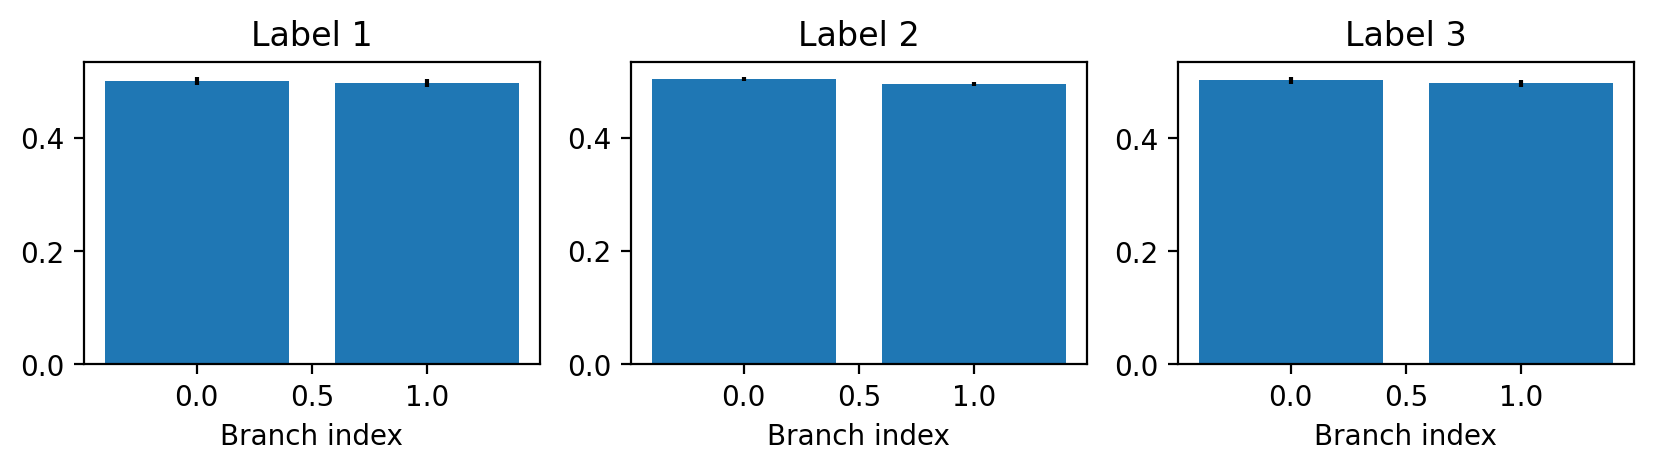

In [25]:
fig, ax = plt.subplots(1, 3, figsize = (10, 2), dpi = 200)

for i, c in enumerate(all_cs):
    ax[i].bar(np.arange(c.shape[-1]), c.mean(dim=0).numpy(), yerr = c.std(dim=0).numpy() / np.sqrt(c.shape[0]))
    ax[i].set_xlabel('Branch index')
    ax[i].set_title('Label {}'.format(i+1))
plt.show()

tensor([0.5025, 0.4975])

In [ ]:
import matplotlib.pyplot as plt

